# Logística de envíos: ¿Cuándo llega?

## Mentoría DiploDatos 2019 

### Integrantes:

- Alini, Walter
- Salina, Noelia

### Mentora:

- Dal Lago, Virginia

### Práctico: Introducción al Apendizaje Automático

## Motivación

En la actualidad, cada vez más productos se comercializan a través de una plataforma online. Una de las principales ventajas de este sistema es que el usuario puede recibir el producto en su domicilio en una fecha determinada. Pero, ¿cómo sabemos qué día va a llegar? ¿A partir de qué datos podemos predecir la demora del envío? En este práctico se trabajará con datos de envíos de MercadoLibre, el e-commerce más grande de Latinoamérica, analizando y modelando el problema de logística de envíos para poder responder ¿cuándo llega?

## Descripción del dataset

**Datos:**  El conjunto de datos seleccionado para realizar el práctico corresponde a un muestreo aleatorio no uniforme de 500.000 envíos de MercadoLibre. Estos envíos fueron realizados en Brasil en el período comprendido entre Octubre de 2018 y Abril de 2019 (las fechas originales han sido modificadas y adaptadas a un período de tiempo diferente, conservando el día de la semana y considerando los feriados correspondientes). Mientras que las fechas han sido modificadas, los horarios registrados en el dataset son los originales. Los datos comprenden variables tanto categóricas como numéricas. 

El dataset cuenta con las siguientes columnas:

- **Sender_state:** Estado de Brasil de donde sale el envío.
- **Sender_zipcode:** Código postal (de 5 dígitos) de donde sale el envío.
- **Receiver_state:** Estado de Brasil a donde llega el envío.
- **Receiver_zipcode:** Código postal (de 5 dígitos) a donde llega el envío.
- **Shipment_type:** Método de envío (normal, express, super).
- **Quantity:** Cantidad de productos en un envío.
- **Service:** Servicio del correo con el cual se realizó un envío.
- **Status:** Estado del envío (set: listo para ser enviado, sent: enviado, done: entregado, failed: no entregado, cancelled: cancelado).
- **Date_created:** Fecha de creación del envío.
- **Date_sent:** Fecha y hora en que se realizó el envío (salió del correo).
- **Date_visit:** Fecha y hora en que se entregó el envío al destinatario.
- **Shipment_days:** Días hábiles entre que el envío fue enviado (salió del correo) y que fue entregado.

## Objetivos generales

* Realizar de manera completa el proceso de desarrollo de un modelo de aprendizaje automático para determinar cuándo llega un envío. 
* Desarrollar el conocimiento práctico sobre dicho proceso, desde la definición de los datasets, la elección y análisis del modelo y las métricas propias para la problemática.
* Desarrollar habilidades de comunicación de la información obtenida a partir de los datos de manera clara y sencilla.


## Objetivos específicos

* Desafiar las decisiones e implementaciones realizadas en el práctico anterior, respecto a la transformación y selección de features.
* Aprender y aplicar técnicas de particionado de datasets para problemáticas de naturaleza temporal.
* Afianzar los conocimientos sobre los tipos de modelos aplicables a la problemática y ampliación de los criterios para la selección de los mismos.
* Ampliar la experiencia en la selección de hiperparámetros y la evaluación de modelos.
* Conocer, compartir e incrementar la dinámica de trabajo grupal.

## Metodología

A partir de lo estudiado en las clases teóricas y prácticas de la materia “Introducción al aprendizaje automático”, realizar un informe en formato de notebook o interactivo, en el cual se respondan, y justifiquen, las siguientes preguntas (además de cualquiera otra información extra que se considere de relevancia sobre la problemática): 

1. En el práctico anterior se respondió al siguiente enunciado: “A la hora de determinar la promesa de entrega de un envío (fecha estimada de llegada), ¿cuáles son los features que consideran pueden tener mayor relevancia? ¿Cuál es el valor a predecir?”. Recupere esa respuesta y presente un breve resumen de los features que consideraron de mayor relevancia y el target seleccionado para predecir.
2. El primer paso para desarrollar un modelo de aprendizaje automático es contar con datos limpios. ¿Qué pasos harían para limpiar el dataset?
3. Es necesario poder separar el dataset en un conjunto de entrenamiento y en uno de test. ¿Cómo realizaría esta separación? ¿Qué tamaño emplearía para cada uno considerando que partimos de 500.000 datos?
4. Dados los datos que disponemos y el target antes seleccionado, ¿qué tipo de modelo emplearían (regresión o clasificación)?
5. Definir el modelo a utilizar, entrenar y evaluar el mismo utilizando los valores por defecto propios de la librería scikit-learn. Analizar los resultados obtenidos en el contexto de la problemática (por ejemplo, ¿por qué creen que para ciertos valores del target tiene mejor performance que para otros?).
6. Modificar los hiperparámetros propios del modelo, y volver a entrenar y evaluar. ¿Por qué se eligió dicho valor para modificar? ¿Qué consecuencias tuvo? ¿Mejoró la performance del modelo? Analice los resultados obtenidos en el contexto de la problemática.
7. En los puntos anteriores se seleccionó un modelo de regresión o bien uno de clasificación. Realice una prueba con un modelo del otro tipo y comente sobre las métricas y los resultados obtenidos. ¿Por qué tuvo mejor o peor perfomance?

Esta comunicación debe estar dirigida para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañeros de clase). Se evaluará, principalmente, la claridad del mensaje presentado, el uso de las herramientas, los conceptos y los modelos desarrollados en las clases teóricas. 

## Estructura del informe


El informe debe contar con la estructura propia de un reporte de un experimento científico. Esto implica que debe tener un objetivo claro, una introducción a la problemática a resolver en dicho informe (no únicamente al problema general), una descripción de los datos a emplear, el desarrollo propiamente dicho del experimento y las conclusiones que se obtuvieron.

En el informe se deberá brindar una descripción del dataset suministrado (columnas, tipo de variables, valores extremos, etc.), las visualizaciones realizadas que sean pertinentes para la resolución del práctico, un análisis del modelo seleccionado, el análisis y las respuestas a las preguntas indicadas anteriormente, y las conclusiones.


## Entrega

* Muestra de avance: Viernes 19 de Julio
* Informe final: Viernes 26 de Julio

## Desarrollo

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from ml.visualization import plot_confusion_matrix, plot_learning_curve

BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

RELATIVE_PATH = './'
DATA_FILE = 'data_sample_corrected_cleaned.csv'
DATA_FILE_FEATURES = 'data_sample_cleaned_features.csv'

TARGET_ID = 'shipment_days_category'
TARGET_CLASES = [0,1,2,3,4,5]

# Establecemos una semilla por cuestiones de reproducibilidad
np.random.seed(0)

### Lectura y análisis inicial de los datos

In [2]:
ds = pd.read_csv(RELATIVE_PATH + DATA_FILE_FEATURES, 
                       dtype={'sender_zipcode':'int64',
                              'receiver_zipcode':'int64',
                              'quantity':'int64',
                              'service':'int64'},
                       parse_dates=['date_created','date_sent','date_visit'])

In [3]:
ds.columns

Index(['sender_state', 'sender_zipcode', 'receiver_state_0',
       'receiver_state_1', 'receiver_state_2', 'receiver_state_3',
       'receiver_state_4', 'receiver_state_5', 'receiver_zipcode',
       'shipment_type', 'quantity', 'service_0', 'service_1', 'service_2',
       'service_3', 'service_4', 'status', 'date_created', 'date_sent',
       'date_visit', 'shipment_days', 'receiver_state', 'receiver_frequency',
       'distance', 'tf_sender_zipcode', 'tf_receiver_zipcode', 'standard',
       'shipment_days_category'],
      dtype='object')

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490439 entries, 0 to 490438
Data columns (total 28 columns):
sender_state              490439 non-null object
sender_zipcode            490439 non-null int64
receiver_state_0          490439 non-null int64
receiver_state_1          490439 non-null int64
receiver_state_2          490439 non-null int64
receiver_state_3          490439 non-null int64
receiver_state_4          490439 non-null int64
receiver_state_5          490439 non-null int64
receiver_zipcode          490439 non-null int64
shipment_type             490439 non-null object
quantity                  490439 non-null int64
service_0                 490439 non-null int64
service_1                 490439 non-null int64
service_2                 490439 non-null int64
service_3                 490439 non-null int64
service_4                 490439 non-null int64
status                    490439 non-null object
date_created              490439 non-null datetime64[ns]
date_sent    

In [5]:
ds.sample(5)

,sender_state,sender_zipcode,receiver_state_0,receiver_state_1,receiver_state_2,receiver_state_3,receiver_state_4,receiver_state_5,receiver_zipcode,shipment_type,...,date_sent,date_visit,shipment_days,receiver_state,receiver_frequency,distance,tf_sender_zipcode,tf_receiver_zipcode,standard,shipment_days_category
68803,SP,13304,0,1,1,0,1,0,13203,express,...,2019-03-07 23:41:49,2019-03-08 20:30:00,1.0,SP,185873,0,1330,1320,0,0
345125,SP,4905,0,0,1,1,0,0,79904,standard,...,2019-03-11 19:22:00,2019-03-28 09:55:00,13.0,MS,5866,950,490,7990,1,5
344795,SP,13213,0,1,0,1,1,1,94852,standard,...,2019-03-12 19:56:00,2019-03-22 19:50:00,8.0,RS,31999,1192,1321,9485,1,4
398226,SP,3063,0,1,1,0,1,0,2335,express,...,2019-03-18 19:37:31,2019-03-19 12:06:34,1.0,SP,185873,0,306,233,0,0
443041,SP,1026,0,1,1,0,1,0,14085,express,...,2019-03-01 23:34:01,2019-03-07 16:12:00,1.0,SP,185873,0,102,1408,0,0


### 1. Resumen de features relevantes

> En el práctico anterior se respondió al siguiente enunciado: “A la hora de determinar la promesa de entrega de un envío (fecha estimada de llegada), ¿cuáles son los features que consideran pueden tener mayor relevancia? ¿Cuál es el valor a predecir?”. Recupere esa respuesta y presente un breve resumen de los features que consideraron de mayor relevancia y el target seleccionado para predecir

Del práctico número 2, se llegó a la conclusión de que los features que mayor valor aportaban eran:
* service
* receiver_zipcode

Por otro lado, el valor a predecir se decidió que sea un conjunto de categorías que representaban rangos de tiempos de entrega:
* shipment_days_category

In [6]:
selected_features = ['service_0', 'service_1', 'service_2', 'service_3', 'service_4', 'tf_receiver_zipcode']

### 2. Limpieza de datos

> El primer paso para desarrollar un modelo de aprendizaje automático es contar con datos limpios. ¿Qué pasos harían para limpiar el dataset?

En los prácticos anteriores se implementaron prácticas para lograr un dataset limpio, entre las cuales se encontraron:

* Limpieza de nulos
* Limpieza de duplicados
* Limpieza de valores inconsistentes (shipment_days negativos)

A continuación se muestra que lo anterior ya no se encuentra presente en el dataset con el que se llevará a cabo el siguiente trabajo.

In [7]:
check_null = ds[ds.notnull()].shape == ds.shape
check_duplicates = ds[ds.duplicated()].shape[0] == 0
check_inconsistent = ds[ds.shipment_days < 0].shape[0] == 0
print(f'Chequeo de nulos: {check_null}')
print(f'Chequeo de duplicados: {check_duplicates}')
print(f'Chequeo de inconsistentes: {check_inconsistent}')

Chequeo de nulos: True
Chequeo de duplicados: True
Chequeo de inconsistentes: True


<Figure size 720x432 with 0 Axes>

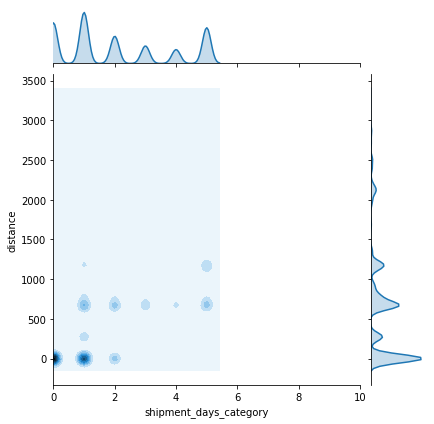

In [62]:
# analizando la "coherencia" de la demora de los envíos. 
# No es de esperarse que los envíos al mismo estado tengan una demora de categoría 5 (potenciales outliers)
plt.figure(figsize=(10,6))
sns.jointplot(data=ds,
                  x='shipment_days_category', y='distance', kind='kde', xlim=(0,5))

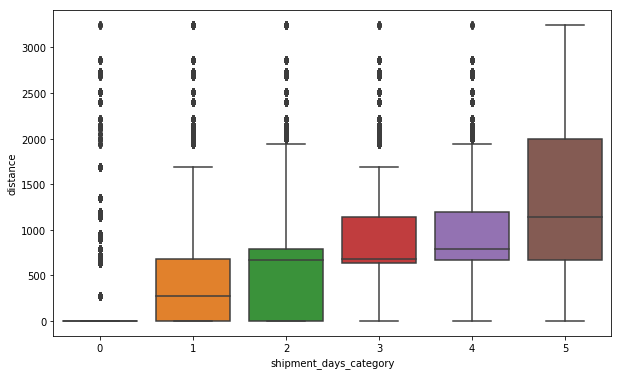

In [154]:
# analizando la "coherencia" de la demora de los envíos. 
# No es de esperarse que los envíos al mismo estado tengan una demora de categoría 5 (potenciales outliers)
plt.figure(figsize=(10,6))
sns.boxplot(data=ds,
                  x='shipment_days_category', y='distance')

<Figure size 720x432 with 0 Axes>

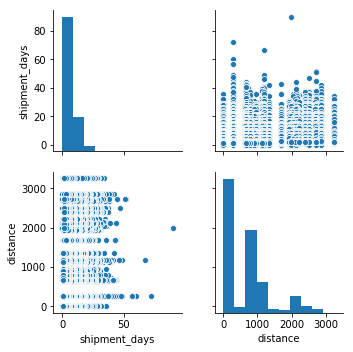

In [159]:
# analizando la "coherencia" de la demora de los envíos. 
# No es de esperarse que los envíos al mismo estado tengan una demora de categoría 5 (potenciales outliers)
plt.figure(figsize=(10,6))
sns.pairplot(data=ds[['shipment_days','distance']])

### 3. Separación de dataset en Train y Test

> Es necesario poder separar el dataset en un conjunto de entrenamiento y en uno de test. ¿Cómo realizaría esta separación? ¿Qué tamaño emplearía para cada uno considerando que partimos de 500.000 datos?

En primera instancia se decide intentar una partición por porcentaje de datos, 80% para train y 20% para test, pero al tener el día 14-03-2019 compartido por ambos datasets, se decidió particionar por esa fecha. Por lo tanto, todos aquellos envíos creados hasta el día 14-03-2019 (inclusive) serán utilizados para entrenar (dataset de train) y los demás, para probar nuestros modelos (dataset de test).

El motivo por el cual se decidió tomar una partición aproximada a 80-20 se basó en lograr un equilibrio entre tener un gran porcentaje de datos para que nuestros modelos puedan aprender de ellos y un porcentaje inferior pero significativo (dada la gran cantidad de datos disponibles) para probar que nuestros modelos lograron generalizar bien el aprendizaje adquirido en el entrenamiento.

In [8]:
# se re-ordenan los envíos por fecha de creación en orden ascendente
ds = ds.sort_values('date_created',ascending=True).reset_index(drop=True)

In [9]:
# se define inicialmente un tamaño para el dataset de train equivalente al 80% del tamaño total del dataset
train_size = int(ds.shape[0]*0.80) - 1

In [10]:
# se muestra la cantidad de envíos que quedarían en el dataset de train si se particiona con el criterio del porcentaje
# se muestran también las fechas de los envíos que quedarían en el dataset de train
ds.loc[0:train_size,:].date_created.describe()

count                  392351
unique                     94
top       2019-03-05 00:00:00
freq                    19802
first     2018-10-21 00:00:00
last      2019-03-14 00:00:00
Name: date_created, dtype: object

In [11]:
# se muestra la cantidad de envíos que quedarían en el dataset de test si se particiona con el criterio del porcentaje
# se muestran también las fechas de los envíos que quedarían en el dataset de test
ds.loc[train_size + 1 :,:].date_created.describe()

count                   98088
unique                     15
top       2019-03-19 00:00:00
freq                    12439
first     2019-03-14 00:00:00
last      2019-03-28 00:00:00
Name: date_created, dtype: object

In [12]:
# se define una fecha que utilizaremos como thresold para realizar la partición de datasets train y test
threshold_date = '2019-03-14'
# se muestra la cantidad de envíos que quedarían en el dataset de train si se particiona con el criterio de la fecha
# se muestran también las fechas de los envíos que quedarían en el dataset de train
ds[ds.date_created <= threshold_date].date_created.describe()

count                  395577
unique                     94
top       2019-03-05 00:00:00
freq                    19802
first     2018-10-21 00:00:00
last      2019-03-14 00:00:00
Name: date_created, dtype: object

In [13]:
# se muestra la cantidad de envíos que quedarían en el dataset de test si se particiona con el criterio de la fecha
# se muestran también las fechas de los envíos que quedarían en el dataset de test
ds[ds.date_created > threshold_date].date_created.describe()

count                   94862
unique                     14
top       2019-03-19 00:00:00
freq                    12439
first     2019-03-15 00:00:00
last      2019-03-28 00:00:00
Name: date_created, dtype: object

In [14]:
# una vez adoptado un criterio, el de la fecha, se genera una nueva columna para contener el indicador de a cual
# dataset pertenece cada envío y se muestran los procentajes finales de cada dataset.
ds.loc[ds.date_created <= threshold_date, 'ds_train'] = True
ds.loc[ds.date_created > threshold_date, 'ds_train'] = False
ds['ds_train'].value_counts(normalize=False)

True     395577
False     94862
Name: ds_train, dtype: int64

A continuación, se separan los datasets de train y test de acuerdo al análisis previo. Para el entrenamiento y validación de modelos se hará uso del dataset de train y se guardará el dataset de test para evaluar la performance de nuestros modelos.

In [15]:
ds_test = ds[~ds['ds_train']]
ds_train = ds[ds['ds_train']]

### 4. Selección del tipo de modelo (Regresión/Clasificación)

> Dados los datos que disponemos y el target antes seleccionado, ¿qué tipo de modelo emplearían (regresión o clasificación)?

El tipo de modelo que mejor se adapta es uno de regresión, ya que el valor a predecir es de naturaleza numérica y no categórica.

### 5. Entrenamiento y evaluación del modelo seleccionado

> Definir el modelo a utilizar, entrenar y evaluar el mismo utilizando los valores por defecto propios de la librería scikit-learn. Analizar los resultados obtenidos en el contexto de la problemática (por ejemplo, ¿por qué creen que para ciertos valores del target tiene mejor performance que para otros?).

#### 5.0 Definición de una muestra reducida del DS Train para entrenar diferentes modelos

In [53]:
sample_size = 100/100
train_sample_size = int(ds_train.shape[0]*sample_size) - 1
ds_train_sample = ds_train.loc[0:train_sample_size,:]

In [54]:
features = ds_train_sample[selected_features]
labels = ds_train_sample['shipment_days_category']

In [160]:
sgdc_linear = linear_model.SGDClassifier(random_state=0)
sgdc_linear.fit(features,labels)

/Users/nsalina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [139]:
y_pred = sgdc_linear.predict(features)
print(classification_report(labels, y_pred,labels=TARGET_CLASES, output_dict = False))

/Users/nsalina/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nsalina/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.55      0.53      0.54     70940
           1       0.30      0.57      0.40     98543
           2       0.13      0.34      0.19     56488
           3       0.00      0.00      0.00     40442
           4       0.00      0.00      0.00     35328
           5       0.00      0.00      0.00     93836

    accuracy                           0.28    395577
   macro avg       0.17      0.24      0.19    395577
weighted avg       0.19      0.28      0.22    395577



/Users/nsalina/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [140]:
labels.value_counts(normalize=False)

1    98543
5    93836
0    70940
2    56488
3    40442
4    35328
Name: shipment_days_category, dtype: int64

In [141]:
pd.DataFrame({'label':y_pred}).label.value_counts(normalize=False)

1    185100
2    143092
0     67385
Name: label, dtype: int64

In [142]:
# validando los labels
18284+56167+24092

98543

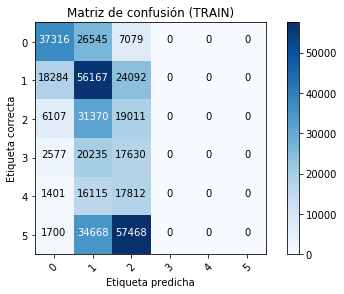

In [151]:
plot_confusion_matrix(confusion_matrix(labels, y_pred),
                          classes=TARGET_CLASES, title="Matriz de confusión (TRAIN)")

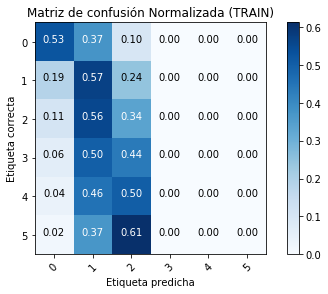

In [144]:
plot_confusion_matrix(confusion_matrix(labels, y_pred),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TRAIN)")

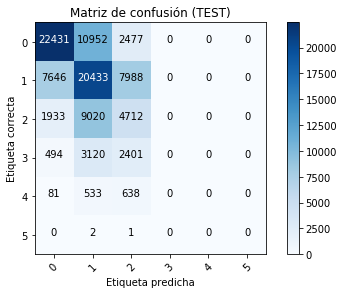

In [148]:
features_test = ds_test[selected_features]
labels_test = ds_test['shipment_days_category']
y_pred_test = gscv_linear.predict(features_test)
#print(classification_report(labels_test, y_pred_test))
plot_confusion_matrix(confusion_matrix(labels_test, y_pred_test),
                          classes=TARGET_CLASES, title="Matriz de confusión (TEST)")

In [129]:
clf_tree = tree.DecisionTreeClassifier(random_state=0,max_depth=5000)
clf_tree = clf_tree.fit(features, labels)
y_pred_tree = clf_tree.predict(features)

In [130]:
print(classification_report(labels, y_pred_tree,labels=TARGET_CLASES, output_dict = False))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69     70940
           1       0.59      0.67      0.63     98543
           2       0.50      0.34      0.40     56488
           3       0.41      0.18      0.25     40442
           4       0.45      0.11      0.17     35328
           5       0.59      0.89      0.71     93836

    accuracy                           0.58    395577
   macro avg       0.53      0.49      0.48    395577
weighted avg       0.56      0.58      0.55    395577



In [131]:
pd.DataFrame({'label':y_pred_tree}).label.value_counts(normalize=False)

5    140838
1    111972
0     77389
2     38711
3     18339
4      8328
Name: label, dtype: int64

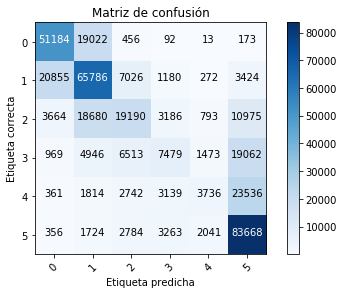

In [132]:
plot_confusion_matrix(confusion_matrix(labels, y_pred_tree),normalize=False,
                          classes=TARGET_CLASES, title="Matriz de confusión")

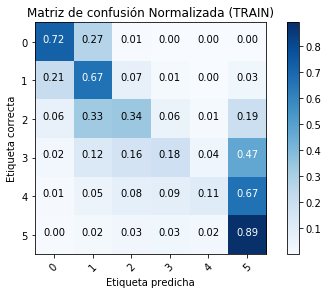

In [133]:
plot_confusion_matrix(confusion_matrix(labels, y_pred_tree),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TRAIN)")

In [134]:
y_pred_tree_test = clf_tree.predict(features_test)

In [135]:
pd.DataFrame({'label':y_pred_tree_test}).label.value_counts(normalize=False)

1    37515
0    36165
2     9039
5     8787
3     2585
4      771
Name: label, dtype: int64

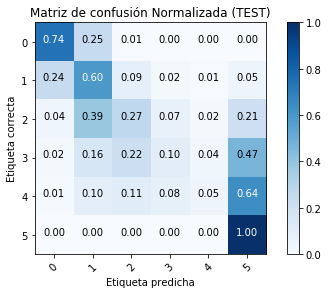

In [136]:
plot_confusion_matrix(confusion_matrix(labels_test, y_pred_tree_test),normalize=True,
                          classes=TARGET_CLASES, title="Matriz de confusión Normalizada (TEST)")

### 6. Selección y evaluación de hiperparámetros

> Modificar los hiperparámetros propios del modelo, y volver a entrenar y evaluar. ¿Por qué se eligió dicho valor para modificar? ¿Qué consecuencias tuvo? ¿Mejoró la performance del modelo? Analice los resultados obtenidos en el contexto de la problemática.

In [56]:
parms = [
{
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [1000],
    'loss': ['log'],
    'penalty': ['l2']
}
]
clf_linear = linear_model.SGDClassifier(random_state=0)
gscv_linear = GridSearchCV(estimator=clf_linear,
                               param_grid=parms,
                               cv=5,
                               n_jobs=-1)
gscv_linear.fit(features,labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=0,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                    1000.0],
                          'loss': ['log'], 'max_iter': [1000],
                

In [139]:
y_pred = gscv_linear.predict(features)
print(classification_report(labels, y_pred,labels=TARGET_CLASES, output_dict = False))

/Users/nsalina/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/nsalina/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.55      0.53      0.54     70940
           1       0.30      0.57      0.40     98543
           2       0.13      0.34      0.19     56488
           3       0.00      0.00      0.00     40442
           4       0.00      0.00      0.00     35328
           5       0.00      0.00      0.00     93836

    accuracy                           0.28    395577
   macro avg       0.17      0.24      0.19    395577
weighted avg       0.19      0.28      0.22    395577



/Users/nsalina/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


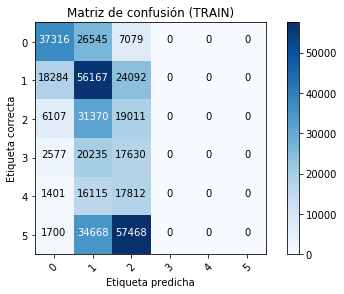

In [151]:
plot_confusion_matrix(confusion_matrix(labels, y_pred),
                          classes=TARGET_CLASES, title="Matriz de confusión (TRAIN)")

### 7. Comparación entre el tipo de modelo seleccionado y el descartado

> En los puntos anteriores se seleccionó un modelo de regresión o bien uno de clasificación. Realice una prueba con un modelo del otro tipo y comente sobre las métricas y los resultados obtenidos. ¿Por qué tuvo mejor o peor perfomance?

## Conclusiones